In [5]:
import pandas as pd
import numpy as np
from scapy.all import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf
def extract_jitter_info(pcap_file):
    packets = rdpcap(pcap_file)
    timestamps = [pkt.time for pkt in packets if pkt.haslayer(UDP)]
    jitter_values = []

    for i in range(1, len(timestamps)):
        jitter_values.append(abs(timestamps[i] - timestamps[i - 1]))

    return jitter_values



In [7]:
pcap_files = ['experiment_with_policies_tcpdump_output_fast_{}.pcap'.format(i) for i in range(1, 4)]
jitter_data = {}

for i, file in enumerate(pcap_files):
    jitter_data[f'file_{i + 1}'] = extract_jitter_info(file)

In [ ]:
jitter_df = pd.DataFrame.from_dict(jitter_data, orient='index').T
jitter_df = jitter_df.dropna(axis=1, how='all')
# Convert jitter_df to numeric data type
jitter_df = jitter_df.apply(pd.to_numeric, errors='coerce')

# Drop columns with all-NaN values
jitter_df = jitter_df.dropna(axis=1, how='all')

# Calculate median jitter values
median_jitter_without = jitter_df.median(axis=1)



# # Plot median jitter values over time
# median_jitter.plot()
# plt.title('Median Jitter Values across 10 pcap files')
# plt.xlabel('Time Index')
# plt.ylabel('Jitter (seconds)')
# plt.show()


In [ ]:
pcap_files = ['with/tcpdump_output_{}.pcap'.format(i) for i in range(1, 11)]
jitter_data = {}

for i, file in enumerate(pcap_files):
    jitter_data[f'file_{i + 1}'] = extract_jitter_info(file)

In [ ]:
jitter_df = pd.DataFrame.from_dict(jitter_data, orient='index').T
jitter_df = jitter_df.dropna(axis=1, how='all')
# Convert jitter_df to numeric data type
jitter_df = jitter_df.apply(pd.to_numeric, errors='coerce')

# Drop columns with all-NaN values
jitter_df = jitter_df.dropna(axis=1, how='all')

# Calculate median jitter values
median_jitter_with = jitter_df.median(axis=1)



# # Plot median jitter values over time
# median_jitter.plot()
# plt.title('Median Jitter Values across 10 pcap files')
# plt.xlabel('Time Index')
# plt.ylabel('Jitter (seconds)')
# plt.show()


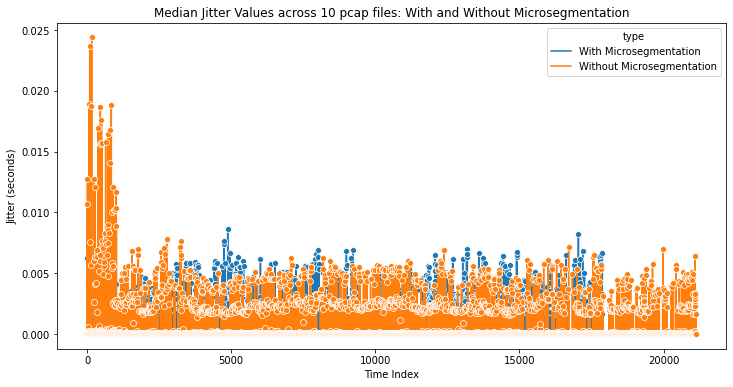

<Figure size 432x288 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Series to DataFrames if needed and add an index column
if isinstance(median_jitter_without, pd.Series):
    median_jitter_without = median_jitter_without.to_frame(name='jitter')
median_jitter_without['index'] = median_jitter_without.index
median_jitter_without['type'] = 'Without Microsegmentation'

if isinstance(median_jitter_with, pd.Series):
    median_jitter_with = median_jitter_with.to_frame(name='jitter')
median_jitter_with['index'] = median_jitter_with.index
median_jitter_with['type'] = 'With Microsegmentation'

# Combine the two DataFrames
combined_jitter = pd.concat([median_jitter_with, median_jitter_without], ignore_index=True)

# Use seaborn to create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_jitter, x='index', y='jitter', hue='type', marker='o')

# Customize the plot with title and labels
plt.title('Median Jitter Values across 10 pcap files: With and Without Microsegmentation')
plt.xlabel('Time Index')
plt.ylabel('Jitter (seconds)')


# plt.savefig('jitter.pdf', bbox_inches='tight')
# Save the plot to a PDF file
pdf = matplotlib.backends.backend_pdf.PdfPages("output_plot.pdf")
pdf.savefig(bbox_inches='tight')
pdf.close()

# Display the plot

plt.show()
plt.savefig('jitter.pdf')

Text(0, 0.5, 'Jitter (seconds)')

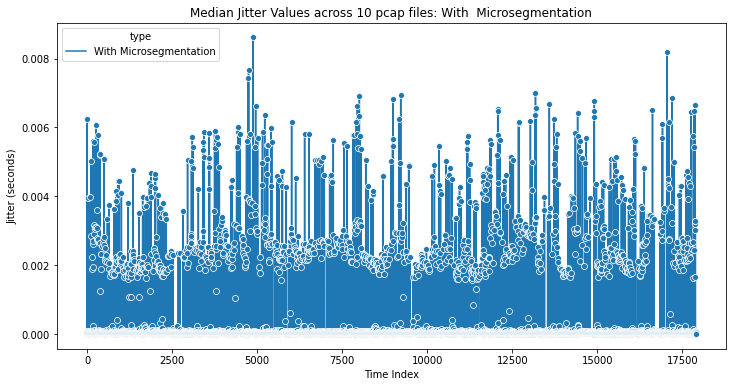

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=median_jitter_with, x='index', y='jitter', hue='type', marker='o')

# Customize the plot with title and labels
plt.title('Median Jitter Values across 10 pcap files: With  Microsegmentation')
plt.xlabel('Time Index')
plt.ylabel('Jitter (seconds)')

<AxesSubplot:>

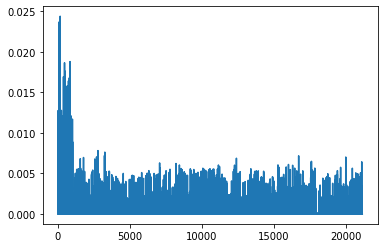

In [14]:
median_jitter_without["jitter"].plot()

In [9]:
median_jitter_without.describe()

,jitter,index
count,21122.000000,21122.000000
mean,0.000245,10560.500000
std,0.000970,6097.540529
min,0.000002,0.000000
25%,0.000029,5280.250000
50%,0.000037,10560.500000
75%,0.000048,15840.750000
max,0.024394,21121.000000


In [10]:
median_jitter_with.describe()

,jitter,index
count,17891.000000,17891.000000
mean,0.000233,8945.000000
std,0.000796,5164.831169
min,0.000002,0.000000
25%,0.000030,4472.500000
50%,0.000038,8945.000000
75%,0.000048,13417.500000
max,0.008611,17890.000000


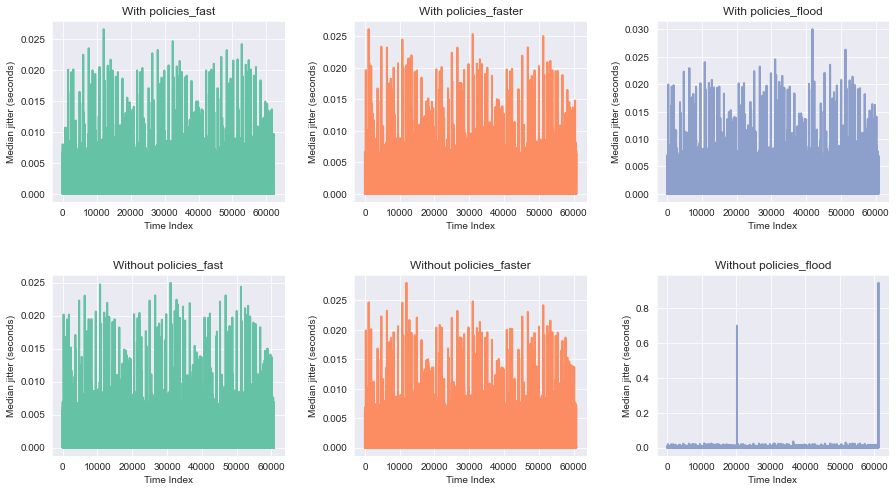

In [20]:
import pandas as pd
from scapy.all import *
import matplotlib.pyplot as plt
import seaborn as sns

def extract_jitter_info(pcap_file):
    packets = rdpcap(pcap_file)
    timestamps = [pkt.time for pkt in packets if pkt.haslayer(UDP)]
    jitter_values = []

    for i in range(1, len(timestamps)):
        x = abs(timestamps[i] - timestamps[i - 1])
        jitter_values.append(x if x<1 else 0)

    return jitter_values

# Group files based on with or without policies and fast/faster/flood subgroups
with_files = {
    'fast': ['with_tcpdump_output_fast_1.pcap',
             'with_tcpdump_output_fast_2.pcap',
             'with_tcpdump_output_fast_3.pcap'],
    'faster': ['with_tcpdump_output_faster_1.pcap',
               'with_tcpdump_output_faster_2.pcap',
               'with_tcpdump_output_faster_3.pcap'],
    'flood': ['with_tcpdump_output_flood_1.pcap',
              'with_tcpdump_output_flood_2.pcap',
              'with_tcpdump_output_flood_3.pcap']
}

without_files = {
    'fast': ['without_tcpdump_output_fast_1.pcap',
             'without_tcpdump_output_fast_2.pcap',
             'without_tcpdump_output_fast_3.pcap'],
    'faster': ['without_tcpdump_output_faster_1.pcap',
               'without_tcpdump_output_faster_2.pcap',
               'without_tcpdump_output_faster_3.pcap'],
    'flood': ['without_tcpdump_output_flood_1.pcap',
              'without_tcpdump_output_flood_2.pcap',
              'without_tcpdump_output_flood_3.pcap']
}

# Extract jitter values from each file and calculate median for each subgroup
with_data = {}
without_data = {}

for subgroup, files in with_files.items():
    with_data[subgroup] = []
    for file in files:
        with_data[subgroup].extend(extract_jitter_info(file))
    with_data[subgroup] = pd.DataFrame(with_data[subgroup], columns=[subgroup]).median(axis=1)

for subgroup, files in without_files.items():
    without_data[subgroup] = []
    for file in files:
        without_data[subgroup].extend(extract_jitter_info(file))
    without_data[subgroup] = pd.DataFrame(without_data[subgroup], columns=[subgroup]).median(axis=1)

# Plot median jitter values for each group and subgroup
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

sns.set_palette('Set2')

for i, (group, data) in enumerate([('With policies', with_data), ('Without policies', without_data)]):
    for j, (subgroup, median) in enumerate(data.items()):
        median.plot(ax=axes[i, j], kind='line', color='C{}'.format(j), linewidth=2)
        axes[i, j].set_title(group+"_"+subgroup)
        axes[i, j].set_xlabel('Time Index')
        axes[i, j].set_ylabel('Median jitter (seconds)')
    axes[i, 0].set_ylabel


In [19]:
without_data[without_data['faster']<1]['faster'].plot()
with_data['faster'].plot()

TypeError: unhashable type: 'Series'

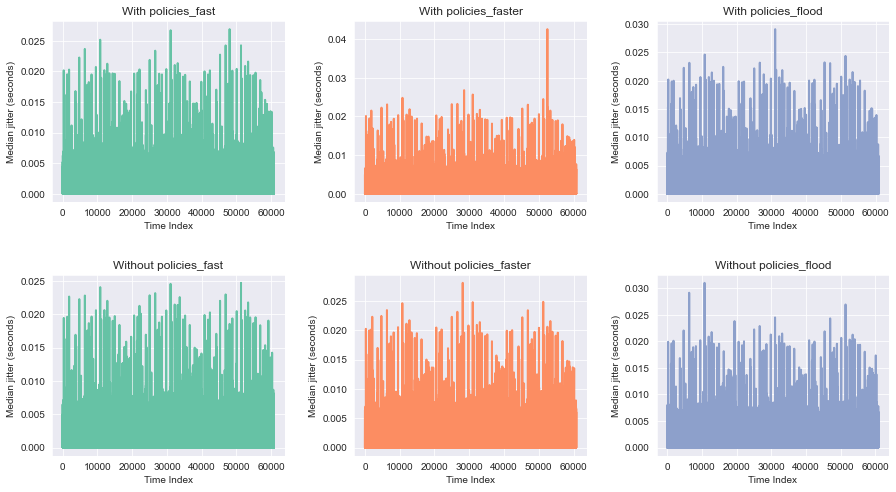

In [12]:
# Plot median jitter values for each group and subgroup
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

sns.set_palette('Set2')

for i, (group, data) in enumerate([('With policies', with_data), ('Without policies', without_data)]):
    for j, (subgroup, median) in enumerate(data.items()):
        median.plot(ax=axes[i, j], kind='line', color='C{}'.format(j), linewidth=2)
        axes[i, j].set_title(group+"_"+subgroup)
        axes[i, j].set_xlabel('Time Index')
        axes[i, j].set_ylabel('Median jitter (seconds)')
    axes[i, 0].set_ylabel


In [10]:
with_data['fast']

0        0.000025
1        0.000029
2        0.000050
3        0.000056
4        0.000020
           ...   
60787    0.000045
60788    0.000016
60789    0.000018
60790    0.000045
60791    0.000043
Length: 60792, dtype: float64